In [33]:
# Import Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import os
import matplotlib.pyplot as plt
from skimage.feature import hog
import random
import cv2
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
# %matplotlib notebook
from sklearn import svm, metrics, datasets
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split
from skimage.io import imread
from skimage.transform import resize
import skimage.io # Import the skimage module
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [9]:
# Unzip Folder
!unzip /content/images.zip

Archive:  /content/images.zip
replace images/dalmatian/image_0001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Load and preprocess image data

In [10]:
image_folder = "/content/images"  # Path to the image folder
categories = os.listdir(image_folder)  # Get the list of categories

for category in categories:
  category_path = os.path.join(image_folder, category)
  print(category_path)

  for image_file in os.listdir(category_path):
    image_path = os.path.join(category_path, image_file)
    # Process the image file (e.g., read using OpenCV or Pillow)
    print(image_path)

/content/images/sunflower
/content/images/sunflower/image_0075.jpg
/content/images/sunflower/image_0062.jpg
/content/images/sunflower/image_0053.jpg
/content/images/sunflower/image_0066.jpg
/content/images/sunflower/image_0042.jpg
/content/images/sunflower/image_0076.jpg
/content/images/sunflower/image_0078.jpg
/content/images/sunflower/image_0033.jpg
/content/images/sunflower/image_0017.jpg
/content/images/sunflower/image_0024.jpg
/content/images/sunflower/image_0043.jpg
/content/images/sunflower/image_0070.jpg
/content/images/sunflower/image_0071.jpg
/content/images/sunflower/image_0048.jpg
/content/images/sunflower/image_0013.jpg
/content/images/sunflower/image_0022.jpg
/content/images/sunflower/image_0052.jpg
/content/images/sunflower/image_0074.jpg
/content/images/sunflower/image_0001.jpg
/content/images/sunflower/image_0060.jpg
/content/images/sunflower/image_0019.jpg
/content/images/sunflower/image_0030.jpg
/content/images/sunflower/image_0047.jpg
/content/images/sunflower/image

In [11]:
def load_image_files(container_path, dimension=(64, 64)):
    """
    Load image files with categories as subfolder names
    which performs like scikit-learn sample dataset

    Parameters
    ----------
    container_path : string or unicode
        Path to the main folder holding one subfolder per category
    dimension : tuple
        size to which image are adjusted to

    Returns
    -------
    Bunch
    """
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]

    descr = "A image classification dataset"
    images = []
    flat_data = []
    target = []
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            img = skimage.io.imread(file)
            img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')

            # Normalized_img = img_resized / 255.0
            flat_data.append(img_resized.flatten())
            images.append(img_resized)
            target.append(i)
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)

    return Bunch(data=flat_data,
                 target=target,
                 target_names=categories,
                 images=images,
                 DESCR=descr)



In [12]:
# Resizing images to a uniform size.
image_dataset = load_image_files('/content/images', dimension=(64, 64))

In [13]:
image_dataset.data.shape

(309, 12288)

In [14]:
image_dataset.target_names

['sunflower', 'pizza', 'dalmatian', 'soccer_ball', 'dollar_bill']

## Split data into training and test sets

In [15]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    image_dataset.data, image_dataset.target, test_size=0.2,random_state=42)


In [16]:
image_dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [17]:
# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
# Define the parameter grid for GridSearchCV.
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

## Perform Grid Search using GridSearchCV
### Find the best parameters.
### Print the best parameters and get the best model using the best_params_ and best_estimator_ attributes of the GridSearchCV object.

In [19]:
# Grid Search
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [20]:
# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_rf_clf = grid_search.best_estimator_

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


## Model Training:
### Train the Random Forest model on the training data.

In [21]:
# Train the Random Forest model on the training data.
best_rf_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [22]:
# Make predictions on the test set using the best model.
y_pred = best_rf_clf.predict(X_test)

In [23]:
# Evaluate the model using metrics such as accuracy, precision, recall, and F1-score.
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7741935483870968


In [28]:
# Create a confusion matrix and classification report using confusion_matrix and classification_report from sklearn.metrics.
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)
print("\nClassification Report:")
print(classification_rep)


Confusion Matrix:
[[19  1  0  0  0]
 [ 1  6  0  0  1]
 [ 1  0 10  4  0]
 [ 0  0  4  5  0]
 [ 0  1  0  1  8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93        20
           1       0.75      0.75      0.75         8
           2       0.71      0.67      0.69        15
           3       0.50      0.56      0.53         9
           4       0.89      0.80      0.84        10

    accuracy                           0.77        62
   macro avg       0.75      0.74      0.75        62
weighted avg       0.78      0.77      0.77        62



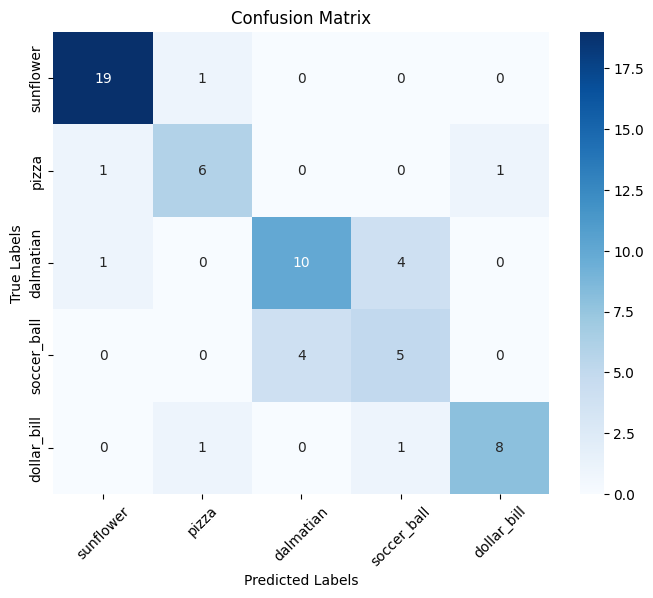

In [35]:
# Visualize the confusion matrix using matplotlib.pyplot.
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=image_dataset.target_names, yticklabels=image_dataset.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.show()

## Feature Importance Visualization:
### Get feature importances from the best model using the feature_importances_ attribute.
### Create a bar plot of feature importances using matplotlib.pyplot.

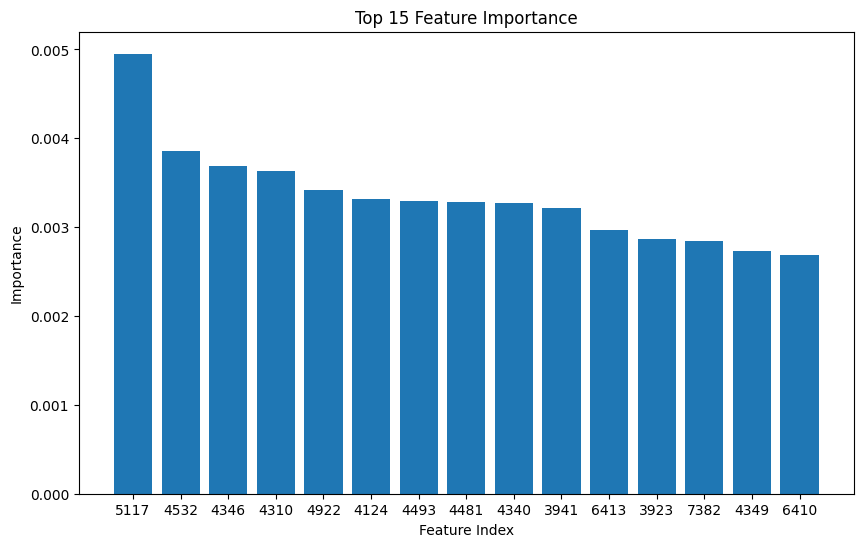

In [40]:
# Get feature importances from the best model using the feature_importances_ attribute for top 15.
feature_importances = best_rf_clf.feature_importances_

# Sort feature importances and get top 15 indices
sorted_indices = np.argsort(feature_importances)[::-1][:15]
top_feature_importances = feature_importances[sorted_indices]

# Create a bar plot of top 15 feature importances using matplotlib.pyplot.
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_feature_importances)), top_feature_importances)

plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Top 15 Feature Importance')
plt.xticks(range(len(top_feature_importances)), sorted_indices)
plt.show()

## Prediction on New Images:
### Implement a function to predict the class of a new image.
### Use the same preprocessing steps as in the data loading function.
### Test the function with a new image and print the predicted class.

In [37]:
# Implement a function to predict the class of a new image.

def predict_image(image_path, model, target_names):

    # Load and preprocess the new image
    img = cv2.imread(image_path)
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Remove grayscale conversion
    img = cv2.resize(img, (64, 64))
    img = img.flatten().reshape(1, -1)
    # img = img / 255.0 # Keep the normalization step consistent with training if applied there

    # Make prediction
    prediction = model.predict(img)
    predicted_class = target_names[prediction[0]]

    return predicted_class

## Example predictions on new images

In [38]:
predict_image('/content/images/soccer_ball/image_0009.jpg', best_rf_clf, image_dataset.target_names)

'soccer_ball'

In [39]:
predict_image('/content/images/pizza/image_0012.jpg', best_rf_clf, image_dataset.target_names)

'soccer_ball'

Bonus: Comparing with SVM:
Implement SVM classification using SVC from sklearn.svm.
Follow a similar process as with Random Forest to train and evaluate the SVM model.
Compare the results of Random Forest and SVM models